# Twitter Data Wrangling

## Gather

three data sources to collect tweetes :
 - 1)twitter-archive-enhanced.csv
 - 2) image-predictions.tsv URL : we will user requests to get it  
 - 3) tweets_json : as I failed to get access for twitter API I will parse the tweets data from the  tweets_json URL ans store it in text file tweets_json.txt 

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import os
import tweepy 
import matplotlib as mtp
import json
import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

tsv_url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
json_url = 'https://video.udacity-data.com/topher/2018/November/5bf60cc8_tweet-json/tweet-json'

csv_file = 'twitter-archive-enhanced.csv'
# output files 
tsv_file = 'image-predictions.tsv'
json_file = 'tweet_json.txt'
# Loadig CSV data into data frame
print ("--------------Loading CSV DataFrame.--------------")
df_csv= pd.read_csv(csv_file)

# get the tsv file from tsv URL and save it into file 
print ("--------------Loading TSV DataFrame.--------------")
response = rq.get(tsv_url)
with open(tsv_file,'wb') as f:
    f.write(response.content)
df_tsv= pd.read_csv(tsv_file,sep='\t')
# get the json file from json URL ,parse ,and save it into file 
print ("--------------Loading JSON DataFrame.--------------")
data = []
with open(json_file,'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))
    df_json= pd.DataFrame(data)
'''
response = rq.get(json_url)
data = []
for line in response.iter_lines():
    data.append(json.loads(line))
df_json = pd.DataFrame(data)
# Saving the result to local file 
df_json.to_csv(json_file,sep=' ', index=False, header=False)
'''
print ("--------------Loading DataFrames is Done .--------------")

--------------Loading CSV DataFrame.--------------
--------------Loading TSV DataFrame.--------------
--------------Loading JSON DataFrame.--------------
--------------Loading DataFrames is Done .--------------


## Assess
In this section we gonna explore and assess the data collected from the three data sources mentioned above 

### exploring Tweets data in the CSV frames data 

In [2]:
df_csv.info()
df_csv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Assess rating_numerator and rating_denominator

In [3]:
df_csv.loc[(df_csv.rating_numerator > 15)]['rating_numerator'].value_counts()
df_csv.loc[(df_csv.rating_denominator != 10)]['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

### Asses if there are records for retweets 

In [4]:
df_csv.loc[( pd.isnull(df_csv.retweeted_status_id))].shape[0]


2175

### exploring Tweets data in the TSV frames data 

In [5]:
#df_tsv.set_index(['p1_dog','p2_dog','p3_dog']) 
#df_tsv.loc[(df_tsv['p1_dog'] == False  )].loc[(df_tsv['p2_dog'] == False )].loc[(df_tsv['p3_dog'] == False )]

df_tsv.info()
df_tsv.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### exploring Tweets data in the JSON frames data 

In [6]:
df_json.info()
df_json.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   object 
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


#### Assess retweet , and favourite info from the data  


In [7]:
print(df_json.loc[(df_json.favorited == True)].shape[0])
print(df_json.loc[(df_json.favorite_count > 0)].shape[0])
print(df_json.loc[(df_json.retweeted == True)].shape[0])
print(df_json.loc[(df_json.retweet_count > 0)].shape[0])


0
2168
0
2331


## **Data Quality Issues**:
### **Validity**:
#### - Tweet Data in **df_CSV**: 'timestamp'  is formatted as string not datetime
#### - Tweet Data in **df_JSON**: 'created_at'  is formatted as string not datetime
### Accuracy:
#### - Tweet Data in **df_CSV**: rating_numerator below 15 is 2330 , 26 records found to have odd values like 420 , 72 ,.... 
#### - Tweet Data in **df_CSV**: rating_denominator should be 10 , but only 2333 records found to be 10 , 23 records found to have odd values like 0 , 170,.... found 
#### - Tweet Data in **df_CSV**: data includes retweets and replys not only original tweets 
#### - Tweet Data in df_CSV: doggo, floofer, pupper ,puppo  variable have zero null values , however  String 'None' is used instead .     
### Consistancy:
#### - Tweet Data in **df_JSON** :  has 0 records with retweeted = True , however 2353 records found to have retweet_count > 0
#### - Tweet Data in **df_JSON** :  has 8 records with favorited = True , however 2175 records found to have favorite_count > 0
### Data Tidiness Issues:
#### - Tweet Data in **df_CSV**: Values of dog_stages 'doggo', 'floofer', 'pupper', 'puppo' are represented as Variable 
#### - Image Data in **df_TSV**: p1, p2,p3 are three columns for the same variable for the gog breed 
#### - Tweet Data in **df_JSON**: retweet is represented in df_csv.retweeted_status_id and df_json.retweeted

## Clean


### Define
#### **Validity**:
#### - Tweet Data in **df_CSV**: format 'timestamp' as datetime
#### - Tweet Data in **df_JSON**: format 'created_at'  as datetime

#### Code

In [8]:
df_csv_clean = df_csv.copy()
df_tsv_clean = df_tsv.copy()
df_json_clean = df_json.copy()
df_csv_clean['timestamp'] = pd.to_datetime(df_csv_clean.timestamp)
df_json_clean['created_at'] = pd.to_datetime(df_json_clean.created_at)

#### Test

In [9]:

df_csv_clean.info()
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define
#### **Accuracy**:
#### -Tweet Data in df_CSV: rating_numerator  and rating_denominator has outlier values
#### Solution : create a new Column 'rating' taht calculates the rating percentage (rating_numerator/rating_denominator) * 100 , so that high numerators with high denomerators will yeild a normal percentage , oullier still there but this will be handled using outliers techniques in reporting .
#### - Tweet Data in df_CSV: data includes retweets and replys
#### solution : delete records 'having retweeted_status_id'  or 'in_reply_to_status_id'  not null 
#### - Tweet Data in df_CSV: doggo, floofer, pupper ,puppo  variable have zero null values , however  String 'None' is used instead .     
#### solution : Clean doggo, floofer, pupper ,puppo  variable (the last four columns ) by replcing 'None' with ''


### Code


In [10]:
# Add rating percentage column using rating_numerator and rating_denominator
df_csv_clean['rating'] = df_csv_clean['rating_numerator'].div(df_csv_clean['rating_denominator']).multiply(100)

#df_csv_clean= df_csv_clean.astype({'rating': 'int32'})
# clean retweets 
df= df_csv_clean.drop(df_csv_clean[pd.notnull(df_csv_clean['retweeted_status_id'])].index, axis = 0, inplace= True)
# clean replies 
df= df_csv_clean.drop(df_csv_clean[pd.notnull(df_csv_clean['in_reply_to_status_id'])].index, axis = 0, inplace= True)
# Clean doggo, floofer, pupper ,puppo  variable (the last four columns )
df_csv_clean.iloc[:, -5:  ] = df_csv_clean.iloc[:, -5:].replace('None','')








  

### Test


In [11]:
print(df_csv_clean.rating.value_counts())
print (df_csv_clean.loc[(  pd.notnull(df_csv_clean.retweeted_status_id))].shape[0])
print (df_csv_clean.loc[(  pd.notnull(df_csv_clean.in_reply_to_status_id))].shape[0])
print (df_csv_clean.loc[( df_csv_clean.doggo =='None')].shape[0])
print (df_csv_clean.loc[( df_csv_clean.floofer =='None')].shape[0])
print (df_csv_clean.loc[( df_csv_clean.pupper =='None')].shape[0])
print (df_csv_clean.loc[( df_csv_clean.puppo =='None')].shape[0])
# note : 'rating' values above 750% should be considered  as outliers
     

120.000000      490
100.000000      438
110.000000      418
130.000000      287
90.000000       153
80.000000        98
70.000000        51
140.000000       38
50.000000        35
60.000000        32
30.000000        19
40.000000        15
20.000000        10
10.000000         4
270.000000        1
81.818182         1
4200.000000       1
0.000000          1
260.000000        1
63.636364         1
342.857143        1
17760.000000      1
750.000000        1
Name: rating, dtype: int64
0
0
0
0
0
0


### Define
#### **Consistancy**:
#### - Tweet Data in df_JSON :  has 0 records with retweeted = True , however 2353 records found to have retweet_count > 0
#### - Tweet Data in df_JSON :  has 8 records with favorited = True , however 2175 records found to have favorite_count > 0
#### Solution : remove retweeted variable and favorited column and use retweet_count and favorite_count to judge if the tweet is favirited or retweeted 


### Code

In [12]:
df_json_clean.drop(['retweeted','favorited'], axis=1, inplace=True)
# Rename Colmn 'id' , 'id_str'
df_json_clean.rename(columns= {'id':'tweet_id' , 'id_str':'tweet_id_str'} , inplace = True)

### Test 

In [13]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   tweet_id                       2331 non-null   int64              
 2   tweet_id_str                   2331 non-null   object             
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

### Define
#### **Data Tideness**:
####- Tweet Data in df_CSV: Values of dog_stages 'doggo', 'floofer', 'pupper', 'puppo' are represented as Variable 
#### Solution : 
####        - Add dog_type by concatenation  'doggo', 'floofer', 'pupper', 'puppo' 
####        - recurseviely clean the '-' 
####        - Finally drop the columns
	

### Code

In [14]:
# Add dog_type by concatenation 
df_csv_clean['dog_type'] = df_csv_clean.doggo +'-'+ df_csv_clean.floofer+'-' + df_csv_clean.pupper +'-'+ df_csv_clean.puppo
# recurseviely clean the '---' , '-' , Starting and ending '-'
df_csv_clean['dog_type']= df_csv_clean['dog_type'].str.replace('---','-')
df_csv_clean['dog_type']= df_csv_clean['dog_type'].str.replace('--','-')
df_csv_clean['dog_type']= df_csv_clean['dog_type'].str.strip(to_strip='-')
# Finally drop the columns 
df_csv_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

### Test

In [16]:
df_csv_clean['dog_type'].value_counts()
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Define
#### **Data Tideness**:
### - Tweet Data in **df_TSV**: p1, p2,p3 are three columns for the same variable for the breed 
####  Solution:
####        - consider only the record with Max 'conf' value for each tweet and ignore the others  

### Code

In [17]:
# rename columns to fit with pd.wide_to_long()
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'breed_1', 'conf_1', 'isdog_1',
       'breed_2', 'conf_2', 'isdog_2',
       'breed_3', 'conf_3', 'isdog_3']
df_tsv_clean.columns = cols
# Use Wide to Long to convert the three columns into three rows  
df_tsv_clean = pd.wide_to_long(df_tsv_clean, stubnames=['breed', 'conf', 'isdog'],i=['tweet_id', 'jpg_url', 'img_num'], j='breed-index', sep="_").reset_index()
# Now each tweeter is represented in three  rows  below is an example 
print( df_tsv_clean.loc[df_tsv_clean['tweet_id'] == 666020888022790149].head())
# Consider only the Max prediction value for each tweet . 
df_tsv_clean = df_tsv_clean.loc[df_tsv_clean.groupby('tweet_id')['conf'].idxmax()]
#df_tsv_clean.loc[df_tsv_clean['isdog' == True]]


             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num  breed-index                   breed      conf  isdog  
0        1            1  Welsh_springer_spaniel  0.465074   True  
1        1            2                  collie  0.156665   True  
2        1            3       Shetland_sheepdog  0.061428   True  


### Test

In [19]:
df_tsv_clean.info()
df_tsv_clean.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 6222
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     2075 non-null   int64  
 1   jpg_url      2075 non-null   object 
 2   img_num      2075 non-null   int64  
 3   breed-index  2075 non-null   int64  
 4   breed        2075 non-null   object 
 5   conf         2075 non-null   float64
 6   isdog        2075 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 115.5+ KB


,tweet_id,jpg_url,img_num,breed-index,breed,conf,isdog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True
12,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True


### Define
#### **Data Quality**:
### - Image Data in **df_TSV**: out of 2075  ,  543 record found to have 'isdog' is false  with  undesired values fo the 'breed' column like :'pug', 'beaver','envelope','bakery',....
####  Solution:
####        - consider only the record with isdog = true , and set the remaining to default value (i.e. 'Unknown')  

Code

In [20]:
df_tsv_clean['dog_breed'] = df_tsv_clean.loc[df_tsv_clean['isdog']]['breed']
df_tsv_clean['dog_breed'] = df_tsv_clean['dog_breed'].fillna(value = 'UnKnown')


Test

In [21]:
df_tsv_clean.info()
df_tsv_clean['dog_breed'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 6222
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     2075 non-null   int64  
 1   jpg_url      2075 non-null   object 
 2   img_num      2075 non-null   int64  
 3   breed-index  2075 non-null   int64  
 4   breed        2075 non-null   object 
 5   conf         2075 non-null   float64
 6   isdog        2075 non-null   bool   
 7   dog_breed    2075 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 131.7+ KB


UnKnown               543
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
                     ... 
Scotch_terrier          1
groenendael             1
clumber                 1
Japanese_spaniel        1
standard_schnauzer      1
Name: dog_breed, Length: 112, dtype: int64

### Define
#### **Data Tideness**:
#### - Tweet Data as a single ovservational unit is not is a single table : Tweet Data is spreaded  over df_JSON , df_TSV and df_CSV .
#### Solution :
####    merge 'retweet_count','favorite_count' , 'dog_breed' data into df_CSV  using tweet_id   

In [22]:
### Code
#Select the fields for join'id','retweet_count','favorite_count' in df_json_clean
df_count =df_json_clean[['tweet_id','retweet_count','favorite_count']]
#Select the fields for join'tweet_id','breed'  in df_json_clean
df_breed =df_tsv_clean[['tweet_id','dog_breed']]
# Make a left join to merge data with 
df_csv_clean = df_csv_clean.merge(df_count,how='left',left_on=['tweet_id'],right_on=['tweet_id'])
df_csv_clean = df_csv_clean.merge(df_breed,how='left',left_on=['tweet_id'],right_on=['tweet_id'])
df_csv_clean['dog_breed'].fillna (value = 'Unknown', inplace= True)
# drop the extra tweet_id column used in join 
#df_csv_clean.drop(['id'], axis= 1, inplace= True)


### Test


In [23]:

df_csv_clean.info()
df_csv_clean.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,130.0,,7340.0,34978.0,UnKnown
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,130.0,,5475.0,30279.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,120.0,,3621.0,22776.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,130.0,,7529.0,38245.0,UnKnown
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,120.0,,8108.0,36522.0,basset


### Finally store the master data frames for Tweets and image prediction 

In [25]:

# Clean the empty columns :
df_csv_clean.dropna(axis= 1,how = 'all',  inplace= True)
# store the final result to csv file 
df_csv_clean.to_csv('twitter_archive_master.csv')
df_csv_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   rating              2097 non-null   float64            
 9   dog_type            2097 non-null   object             
 10  retweet_count       2090 non-null   float64            
 11  favorite_count      2090 non-null   float64            
 12  dog_breed           2097 non-null 

## Building Diagrams for some data insights :
###  Top 10 **Dog Breeds** retweeted and top 10 breeds marked as Favorite

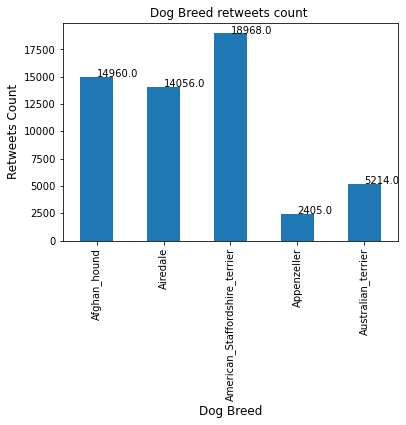

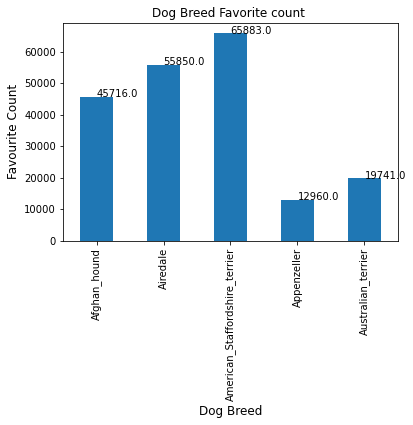

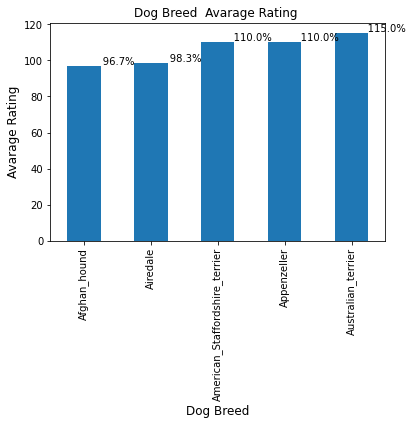

In [27]:
df_plt = df_csv_clean.copy()
# remove outliers stage 1
df_plt = df_csv_clean.loc[ df_csv_clean['dog_breed'] != 'Unknown']
# remove outliers stage 2
df_plt = df_plt.loc[ df_plt['rating'] < 750]

# Dog Breed Type retweets count diagram 

fact= df_plt.groupby('dog_breed')['retweet_count'].sum().head(5)
fact.plot(kind ='bar' , title = 'Dog Breed retweets count ' , fontsize = 10)
plt.xlabel('Dog Breed', fontsize = 12)
plt.ylabel('Retweets Count', fontsize = 12)
# Set bar text
for index,data in enumerate(fact):
    plt.text(x=index , y =data+1 , s= f"{data}")
plt.show()

# Dog Breed Type favourits count diagram 

fact= df_plt.groupby('dog_breed')['favorite_count'].sum().head(5)
fact.plot(kind ='bar' , title = 'Dog Breed Favorite count ' , fontsize = 10)
plt.xlabel('Dog Breed', fontsize = 12)
plt.ylabel('Favourite Count', fontsize = 12)
# Set bar text

for index,data in enumerate(fact):
    plt.text(x=index , y =data+1 , s= f"{data}")
plt.show()

# Dog Breed Type Avarage Rating  diagram 
fact= df_plt.groupby('dog_breed')['rating'].mean().head(5)
fact.plot(kind ='bar' , title = 'Dog Breed  Avarage Rating ' , fontsize = 10)
plt.xlabel('Dog Breed', fontsize = 12)
plt.ylabel('Avarage Rating', fontsize = 12)
# Set bar text
for index,data in enumerate(fact):
    plt.text(x=index , y =data+1 , s= "{:10.1f}%".format(data))
plt.show()




###  Top 10 **Dog Types** having retweets and top 10 marked as Favorite

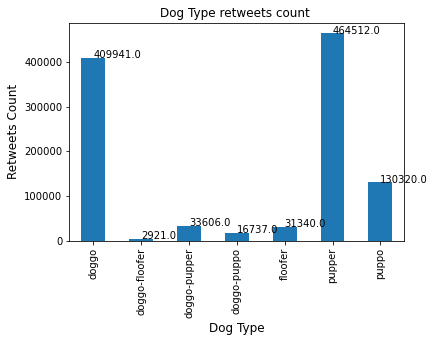

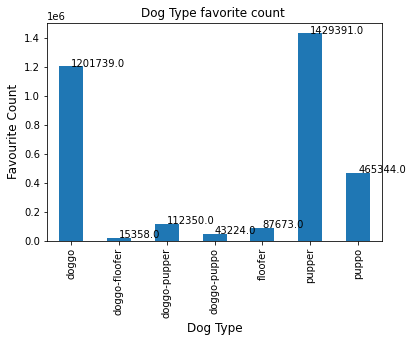

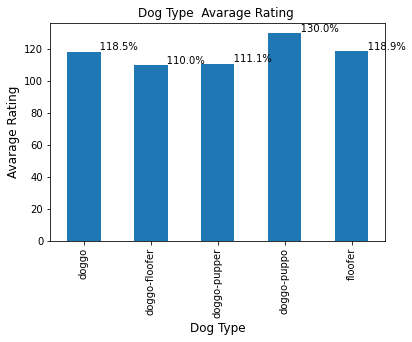

In [29]:
# Clean outliers 
df_plt = df_csv_clean.loc[ df_csv_clean['dog_type'] != '']
# Dog Type retweets count diagram 

fact = df_plt.groupby('dog_type')['retweet_count'].sum()
fact.plot(kind ='bar' , title = 'Dog Type retweets count ' , fontsize = 10)
plt.xlabel('Dog Type', fontsize = 12)
plt.ylabel('Retweets Count', fontsize = 12)
# Set bar text
for index,data in enumerate(fact):
    plt.text(x=index , y =data+1 , s= f"{data}")
plt.show()

# Dog Type favorite  count diagram 
fact = df_plt.groupby('dog_type')['favorite_count'].sum()
fact.plot(kind ='bar' , title = 'Dog Type favorite count ' , fontsize = 10)
plt.xlabel('Dog Type', fontsize = 12)
plt.ylabel('Favourite Count', fontsize = 12)
for index,data in enumerate(fact):
    plt.text(x=index , y =data+1 , s= f"{data}")
plt.show()

# Dog Type Avarage Rating  diagram 

fact =df_plt.groupby('dog_type')['rating'].mean().head(5)
fact.plot(kind ='bar' , title = 'Dog Type  Avarage Rating ' , fontsize = 10)
plt.xlabel('Dog Type', fontsize = 12)
plt.ylabel('Avarage Rating', fontsize = 12)
# Set bar text
for index,data in enumerate(fact):
    plt.text(x=index , y =data+1 , s= "{:10.1f}%".format(data))
plt.show()



# Conclusion:
## from the above analysis  we found the the following  Facts
## the top rated dogs  are :
### - Pupper
### - Doggo
### - Puppo

## the top rated dog breeds are : 
### - American_Staffordshire_terrier
### - Afghan_hound & Airedale 
### - Australian_terrier


